### Problem Statement:

To build a model that classifies news articles as Fake or Real.

### Import Libraries:

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,confusion_matrix

In [2]:
data_news=pd.read_csv("news_articles.csv",usecols=['text','label'])
# Top 5
data_news.head()

,text,label
0,print they should pay all the back all the mon...,Real
1,why did attorney general loretta lynch plead t...,Real
2,red state \nfox news sunday reported this mor...,Real
3,email kayla mueller was a prisoner and torture...,Real
4,email healthcare reform to make america great ...,Real


In [3]:
# Bottom 5
data_news.tail()

,text,label
2091,NaN,Real
2092,NaN,Real
2093,NaN,Fake
2094,NaN,Fake
2095,NaN,NaN


In [4]:
# Checking for null values
data_news.isnull().sum()

text     46
label     1
dtype: int64

In [5]:
# Dropping null values
data_news=data_news.dropna()
data_news.head()

,text,label
0,print they should pay all the back all the mon...,Real
1,why did attorney general loretta lynch plead t...,Real
2,red state \nfox news sunday reported this mor...,Real
3,email kayla mueller was a prisoner and torture...,Real
4,email healthcare reform to make america great ...,Real


In [6]:
data_news.shape   # 2050 rows and 2 columns

(2050, 2)

### Text Pre-processing:

In [7]:
# Using only the text column
sentence=data_news['text']
sentence[:10]

0    print they should pay all the back all the mon...
1    why did attorney general loretta lynch plead t...
2    red state  \nfox news sunday reported this mor...
3    email kayla mueller was a prisoner and torture...
4    email healthcare reform to make america great ...
5    print hillary goes absolutely berserk she expl...
6    breaking nypd ready to make arrests in weiner ...
7    breaking nypd ready to make arrests in weiner ...
8    limbaugh said that the revelations in the wiki...
9    email \nthese people are sick and evil they wi...
Name: text, dtype: object

In [54]:

lemm=WordNetLemmatizer()
stop_words=stopwords.words('english')
custom_stopwords=['print','u','one','said','also','like']
all_stopwords=np.hstack([stop_words,custom_stopwords])
corpus=[]
words=[]
for i in range(len(sentence)):
    # Excluding all characters and numbers 
    word=re.sub("[^a-zA-Z]"," ",sentence[i])
    
    #Lower case
    word=word.lower()
    
    #Splitting sentences into words
    word=word.split()
    
    # Words undergo lemmatization
    word=[lemm.lemmatize(w) for w in word if w not in all_stopwords]
    word=' '.join(word)
    corpus.append(word)
    
    

In [55]:
# New form of text column obtained after text pre-processing
data_news['text_new']=corpus
data_news[['text','text_new']]

,text,text_new
0,print they should pay all the back all the mon...,pay back money plus interest entire family eve...
1,why did attorney general loretta lynch plead t...,attorney general loretta lynch plead fifth bar...
2,red state \nfox news sunday reported this mor...,red state fox news sunday reported morning ant...
3,email kayla mueller was a prisoner and torture...,email kayla mueller prisoner tortured isi chan...
4,email healthcare reform to make america great ...,email healthcare reform make america great sin...
...,...,...
2045,check out hillarythemed haunted house anticlin...,check hillarythemed haunted house anticlinton ...
2046,good samaritan wearing indian headdress disarm...,good samaritan wearing indian headdress disarm...
2047,skype sex scam a fortune built on shame moroc...,skype sex scam fortune built shame moroccan bo...
2048,posted by eddie while the skyhigh potency may ...,posted eddie skyhigh potency may scare away cr...


In [56]:
#Example:
print("Length of 1st row before pre-processing:",len(data_news['text'][0]))
print("Length of 1st row after pre-processing:",len(data_news['text_new'][0]))

Length of 1st row before pre-processing: 492
Length of 1st row after pre-processing: 303


### EDA:

In [58]:
new_words=[]
for i in data_news['text_new']:
    words=i.split()
    new_words.extend(words)

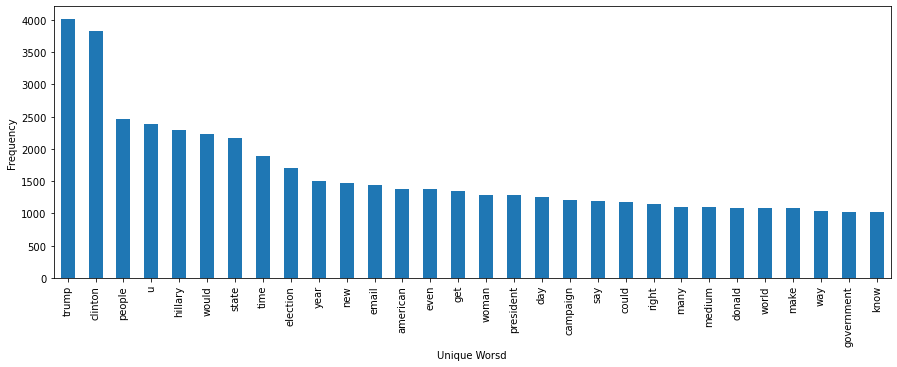

In [59]:
word_freq=pd.Series(new_words).value_counts()[:30]

plt.figure(figsize=(15,5))
word_freq.plot(kind='bar')
plt.xlabel("Unique Worsd")
plt.ylabel("Frequency")
plt.show()

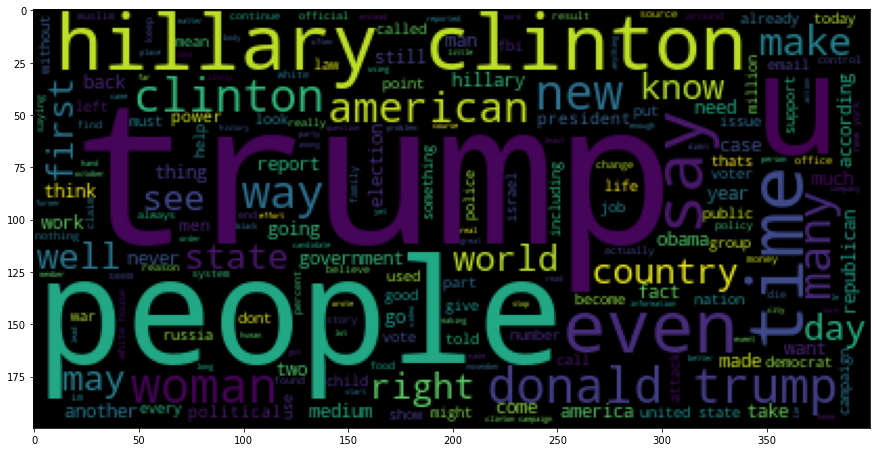

In [60]:
string_wc=" ".join(new_words)
plt.figure(figsize=(15,10))
wc=WordCloud().generate(string_wc)
plt.imshow(wc)
plt.show()

#### As per the plots above, the words trump, hilary,clinton etc have a high frequncy and will be given a lower weightage on constructing bag of words using Tfidf Vectorizer.

### Splitting Data for Train and Test:

In [98]:
train,test=train_test_split(data_news['text_new'],test_size=0.3,random_state=10)

### Bag of Words Model :

In [94]:
# Using Tfidf Vectorizer to build a bag of words

tfidf=TfidfVectorizer(max_df=3).fit(train)

features=tfidf.get_feature_names()
train_dtm=tfidf.transform(train).toarray()
test_dtm=tfidf.transform(test).toarray()

In [95]:
# Independent Variables
df_train_dtm=pd.DataFrame(train_dtm,columns=features)
df_train_dtm.head()

,aadmi,aafe,aah,aaja,aali,aaliya,aaliyas,aam,aand,aap,...,zweitligisten,zweizimmerwohnung,zwerge,zwielichtige,zwingt,zwischenfall,zwischenzeitlich,zwo,zylinderkopfdichtung,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
df_test_dtm=pd.DataFrame(test_dtm,columns=features)
df_test_dtm.head()

,aadmi,aafe,aah,aaja,aali,aaliya,aaliyas,aam,aand,aap,...,zweitligisten,zweizimmerwohnung,zwerge,zwielichtige,zwingt,zwischenfall,zwischenzeitlich,zwo,zylinderkopfdichtung,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# Dependent Variable
data_news['label'].replace({'Fake':1,'Real':0},inplace=True)
y_train=data_news.loc[train.index,'label']
y_train.head()

968     1
1122    0
45      1
1688    1
190     1
Name: label, dtype: int64

In [112]:
y_test=data_news.loc[test.index,'label']
y_test.head()

174     1
758     0
1003    1
999     1
845     0
Name: label, dtype: int64

### Building Classification Model:

In [192]:
# Functions to obatin scores

def train_f1(model):
    y_pred_train=model.predict(df_train_dtm)
    f1_train=f1_score(y_train,y_pred_train)
    return f1_train

def test_f1(model):
    y_pred_test=model.predict(df_test_dtm)
    f1_test=f1_score(y_test,y_pred_test)
    return f1_test

In [203]:
def cm(model):
    y_pred_test=model.predict(df_test_dtm)
    cm=confusion_matrix(y_test,y_pred_test)
    sns.heatmap(cm,cmap=ListedColormap('lightblue'),annot=True,fmt="d",cbar=False,linewidths=0.2)

#### Logistic Regression:

In [204]:
log_reg=LogisticRegression()
log_reg.fit(df_train_dtm,y_train)

LogisticRegression()

In [205]:
train_f1(log_reg)

0.8326417704011064

In [206]:
test_f1(log_reg)

0.7762096774193549

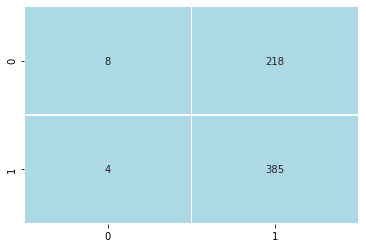

In [207]:
cm(log_reg)

#### As per the confusion Matrix the false positive is very high which is why the f1_score of test data is lower in comparison with the score of traindata.

 #### Multinomial Naive Bayes :

In [208]:
mnb=MultinomialNB()
mnb.fit(df_train_dtm,y_train)

MultinomialNB()

In [209]:
train_f1(mnb)

0.9740820734341253

In [210]:
test_f1(mnb)

0.779731127197518

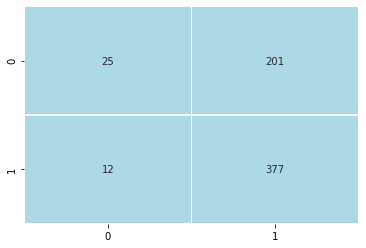

In [211]:
cm(mnb)

#### The model scores mprove that the model is highly overfit.

### Tuning the Multinomial Naive Baye's:

In [219]:
for alpha in np.arange(0,1,0.1):
    mnb=MultinomialNB(alpha=alpha)
    mnb.fit(df_train_dtm,y_train)
    print("Alpha:",round(alpha,2),"Train-f1:",round(train_f1(mnb),3),"Test-f1:",round(test_f1(mnb),3))
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0 Train-f1: 0.982 Test-f1: 0.753
Alpha: 0.1 Train-f1: 0.982 Test-f1: 0.752
Alpha: 0.2 Train-f1: 0.982 Test-f1: 0.757
Alpha: 0.3 Train-f1: 0.98 Test-f1: 0.76
Alpha: 0.4 Train-f1: 0.979 Test-f1: 0.763
Alpha: 0.5 Train-f1: 0.978 Test-f1: 0.768
Alpha: 0.6 Train-f1: 0.978 Test-f1: 0.78
Alpha: 0.7 Train-f1: 0.978 Test-f1: 0.783
Alpha: 0.8 Train-f1: 0.977 Test-f1: 0.782
Alpha: 0.9 Train-f1: 0.974 Test-f1: 0.784


#### The model scores obtained after trying different alpha values all prove that the models are higly overfit.